<a href="https://colab.research.google.com/github/mariamallaa/BabyMonitoring/blob/modules/CNNnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
from glob import glob
import shutil   
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv

import tensorflow as tf
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!unzip annotations_trainval2014.zip



In [0]:

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
from glob import glob
import shutil   
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv

import tensorflow as tf
dataDir='..'
dataType='train2017'
annFile='/content/annotations/instances_train2014.json'
coco=COCO(annFile)

!pip install gluoncv
!pip install mxnet


In [0]:

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()

!mkdir .kaggle
!mv .kaggle /root/
!mv kaggle.json /root/.kaggle/

Saving kaggle.json to kaggle.json


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 98% 228M/232M [00:02<00:00, 71.6MB/s]
100% 232M/232M [00:02<00:00, 81.9MB/s]


In [0]:
!kaggle datasets download -d kwisatzhaderach/nist-mugshots

100% 3.49G/3.49G [01:04<00:00, 42.9MB/s]
100% 3.49G/3.49G [01:04<00:00, 58.1MB/s]


In [0]:
!unzip nist-mugshots.zip

In [0]:
!unzip utk-face-cropped.zip

In [0]:
#reading Image from utkcropped
from glob import glob
from pathlib import Path
from commonfunctions import *
import skimage.io as io
from skimage.color import rgb2gray
xnames=[]
y=[]
path_to_directory='/content/utkcropped'
count=0
files=glob(f"/content/utkcropped/*.jpg")


from skimage.transform import resize

from skimage import img_as_ubyte
count=0
for fname in files:
  count+=1
  xnames.append(fname)
  '''
  img=io.imread(fname)
  gray = np.asarray(img)
  #grayscale = rgb2gray(gray)
  image_downscaled = resize(gray, (128, 128))
  x.append(image_downscaled)
  '''
#show_images([x[0]])
print("done")

done


In [0]:
from glob import glob
from pathlib import Path
from commonfunctions import *
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import img_as_ubyte
xnew=[]
ynew=[]
files=glob(f"/content/drive/My Drive/COCOImages/*")
count=0
for fname in files:
  #print(fname)
  count+=1
  xnames.append(fname)
  '''
  img=io.imread(fname)
  gray = np.asarray(img)
  #grayscale = rgb2gray(gray)
  image_downscaled = resize(gray, (128, 128))
  gray2=tf.convert_to_tensor(gray)
  gray2 = tf.expand_dims(gray2, -1)
  xnew.append(image_downscaled)
  print(count)
  #xnew.append(grayscale)
  '''
print(count)
#show_images([xnew[0]])
#print(ynew[0])
print("done")

26080
done


In [83]:
print(len(xnames))

49789


In [0]:
ylabels=[]
for xname in xnames:
  if("/content/utkcropped" in xname):
    ylabels.append([0])
  else:
    ylabels.append([1])

In [84]:
print(len(ylabels))

49789


In [85]:
#newdataX=np.asarray(newdataX)
print("done")
X_train,X_test,y_train,y_test = train_test_split(xnames,ylabels,test_size = 0.2,random_state=109)
X_testing,X_validate,y_testing,y_validate = train_test_split(X_test,y_test,test_size = 0.5,random_state=109)


done


In [0]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from keras.models import model_from_json
import os


In [87]:
batch_size = 64
num_classes = 1
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

#download mnist data and split into train and test sets

#(X_train, y_train), (X_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt

#print(type(X_train))
#plot the first image in the dataset
#plt.imshow(X_train[0])

#reshape data to fit model
#X_train = X_train.reshape(60000,28,28,1)
#X_test = X_test.reshape(10000,28,28,1)

from keras.utils import to_categorical
#one-hot encode target column
'''
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

'''
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

#K.set_image_dim_ordering('th')
#create model
model = Sequential()
#add model layers
def funclength(x):
    print(x.shape)
    return x
def funcresult(x):
    print(x)
    print(x.eval())
    return x


model.add(Conv2D(8, kernel_size=(3, 3),
                activation='relu', padding='same',
                input_shape=(128,128,3)))
#model.add(Lambda(funclength))

model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
#model.add(Lambda(funclength))

model.add(Conv2D(16, kernel_size=(3, 3), 
                activation='relu',padding='same'))
#model.add(Lambda(funclength))

model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))
#model.add(Lambda(funclength))
model.add(Conv2D(32, kernel_size=(3, 3), 
                activation='relu',padding='same'))

#model.add(Lambda(funclength))
model.add(Conv2D(16, kernel_size=(1, 1), 
                activation='relu',padding='same'))
#model.add(Lambda(funclength))
#model.add(Conv2D(32, kernel_size=(3, 3), 
#                activation='relu',padding='same'))
#model.add(Lambda(funclength))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
#model.add(Lambda(funclength))
#model.add(Conv2D(64, kernel_size=(3, 3), 
#               activation='relu',padding='same'))
#model.add(Lambda(funclength))


#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Lambda(funclength))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='sigmoid'))

#model.add(Lambda(funclength))
#model.add(Lambda(funcresult))

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


In [0]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])


In [91]:
print(len(xnames))
xnamescopy=X_train.copy()
y_traincopy=y_train.copy()
print(len(xnamescopy))

49789
39831


In [92]:
'''
X_trainsample=X_train[:5]
y_trainsample=y_train[:5]
X_validatesample=X_validate[:5]
y_validatesample=y_validate[:5]
'''
import random


#X_tensor = tf.convert_to_tensor(X_train)
#y_tensor = tf.convert_to_tensor(y_train)
#X_tensorval = tf.convert_to_tensor(X_validate)
#y_tensorval = tf.convert_to_tensor(y_validate)
batch_size = 24
#print(X_tensor.shape)
#xnamescopy=X_train.copy()
#y_traincopy=y_train.copy()

def gen(X_train,y_train):
   
    steps_per_epoch = len(X_train) // batch_size
    for j in range(epochs):
      xnamescopy=X_train.copy()
      y_traincopy=y_train.copy()
      
      for i in range(steps_per_epoch):

        batchx_train=[]
        batchy_train=[]
        for k in range(batch_size):
          n = random.randint(0,len(xnamescopy))
          #print("numbeeeeeeeeeeeeeeeeeeer")
          #print(len(xnamescopy))
          #print(n)
          img=io.imread(xnamescopy[n])
          gray = np.asarray(img)
          #grayscale = rgb2gray(gray)
          image_downscaled = resize(gray, (128, 128))
          #print(image_downscaled.shape)
          if(image_downscaled.shape!=(128,128)):

            #show_images([image_downscaled])
            batchx_train.append(image_downscaled)
            batchy_train.append(y_traincopy[n])
          xnamescopy = xnamescopy[:n] + xnamescopy[n+1 :]
          y_traincopy = y_traincopy[:n] + y_traincopy[n+1 :]
        #print(len(batchx_train))
        #print(len(batchx_train[0]))
        
        batchx_train_tensor = tf.convert_to_tensor(batchx_train)
        batchy_train_tensor = tf.convert_to_tensor(batchy_train)
        yield (batchx_train_tensor,
            batchy_train_tensor)
def genval():
   
    steps_per_epoch = len(X_tensorval) // batch_size
    for j in range(epochs):
      for i in range(steps_per_epoch):
          yield (X_tensorval[batch_size * i : batch_size * (i + 1)],
              y_tensorval[batch_size * i : batch_size * (i + 1)])

#print(type(X_train))
#X_NPArray=np.asarray(X_train)
#print(X_tensor.shape)
#print(y_tensor[0])
model.fit(x=gen(X_train,y_train),
        epochs=epochs,
        
        steps_per_epoch=5,
        verbose=1
        #validation_steps=(len(X_tensorval) // batch_size),
        #validation_data=genval()
        
        )

'''
#print(X_train[0]*255)
#print(y_train[0])
'''
'''
model.fit([X_train], [y_train],
        steps_per_epoch=5,
        epochs=epochs,
        verbose=1
        #validation_data=(X_validate,y_validate)
        
        )
'''
'''
#sess=tf.compat.v1.InteractiveSession()

X_tensor = tf.cast(X_tensor, tf.float32)
y=model(X_tensor)
  #tf.enable_eager_execution()
print(y)
from keras import backend as K

k_value = K.eval(y)
print(k_value[0])
'''

Epoch 1/20
5/5 [==============================] - 24s 5s/step - loss: 0.6503 - accuracy: 0.5667
Epoch 2/20
5/5 [==============================] - 24s 5s/step - loss: 0.5142 - accuracy: 0.6083
Epoch 3/20
5/5 [==============================] - 21s 4s/step - loss: 0.6051 - accuracy: 0.6917
Epoch 4/20
5/5 [==============================] - 19s 4s/step - loss: 0.5105 - accuracy: 0.8250
Epoch 5/20
5/5 [==============================] - 23s 5s/step - loss: 0.3684 - accuracy: 0.9244
Epoch 6/20
5/5 [==============================] - 22s 4s/step - loss: 0.3388 - accuracy: 0.8833
Epoch 7/20
5/5 [==============================] - 18s 4s/step - loss: 0.2992 - accuracy: 0.9000
Epoch 8/20
5/5 [==============================] - 20s 4s/step - loss: 0.3887 - accuracy: 0.8583
Epoch 9/20
5/5 [==============================] - 21s 4s/step - loss: 0.2445 - accuracy: 0.9250
Epoch 10/20
5/5 [==============================] - 27s 5s/step - loss: 0.1244 - accuracy: 0.9833
Epoch 11/20
5/5 [======================

'\n#sess=tf.compat.v1.InteractiveSession()\n\nX_tensor = tf.cast(X_tensor, tf.float32)\ny=model(X_tensor)\n  #tf.enable_eager_execution()\nprint(y)\nfrom keras import backend as K\n\nk_value = K.eval(y)\nprint(k_value[0])\n'

In [0]:
batchx_test=[]
print(len(X_testing))
count=0
for X_test in X_testing:
  count+=1
  img=io.imread(X_test)
  gray = np.asarray(img)
  #grayscale = rgb2gray(gray)
  image_downscaled = resize(gray, (128, 128))
  #print(image_downscaled.shape)
  if(image_downscaled.shape!=(128,128)):

    #show_images([image_downscaled])
    batchx_test.append(image_downscaled)
  if(count==400):
    break
  print(count)
batchx_test_tensor = tf.convert_to_tensor(batchx_test)
batchy_test_tensor = tf.convert_to_tensor(y_testing[0:400])

In [94]:
print(batchx_test_tensor.shape)
print(batchy_test_tensor.shape)

(400, 128, 128, 3)
(400, 1)


In [95]:
batchx_test_tensor32 = tf.cast(batchx_test_tensor, tf.float32)
y=model(batchx_test_tensor32)
from keras import backend as K

k_value = K.eval(y)
k_value=np.round(k_value)
acc=1- (sum(abs(k_value[0:400]-y_testing[0:400]))/400)
print(acc)

score = model.evaluate(batchx_test_tensor, batchy_test_tensor,steps=10, verbose=2)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/modelnew.h5")
print("Saved model to disk")


[0.96]
Test loss: 0.00971626490354538
Test accuracy: 9.599999785423279
Saved model to disk


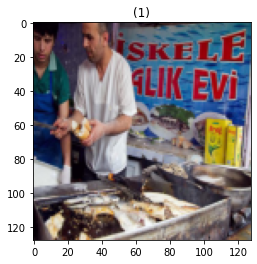

[[1.]]


In [106]:
name=X_validate[13]
img=io.imread(name)
gray = np.asarray(img)
#grayscale = rgb2gray(gray)
image_downscaled = resize(gray, (128, 128))
show_images([image_downscaled])
batchx_valid_tensor = tf.convert_to_tensor([image_downscaled])
batchx_valid_tensor = tf.cast(batchx_valid_tensor, tf.float32)
yvalue=model(batchx_valid_tensor)
k_value = K.eval(yvalue)
k_value=np.round(k_value)
print(k_value)